### **Semana 8: Actividad 1** - Regresión

**Iván Lee Cancino - A01793491**

### **TC4029 - Ciencia y Analítica de Datos**

**Prof. María de la Paz Rico Fernández**

**Prof. Julio César Galindo López**

*09 - Noviembre - 2022*


---


---

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [2]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

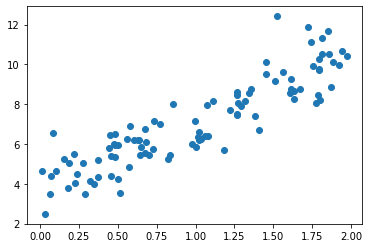

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [4]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [5]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [6]:
#X_fit[]

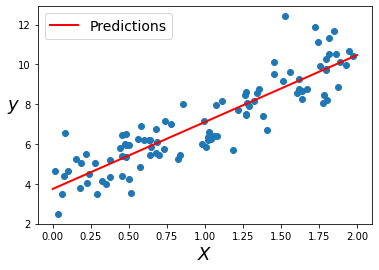

In [7]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [8]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [9]:
X_new.shape

(2, 1)

In [10]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [11]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [12]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [13]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

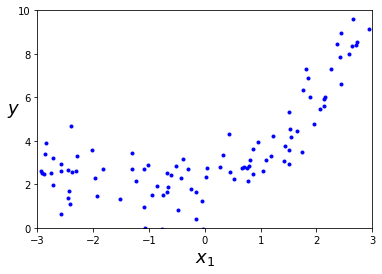

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [15]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [17]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [18]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [19]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [20]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  1.04X +0.51X^2 + 2.02$

Plot the data and the predictions:

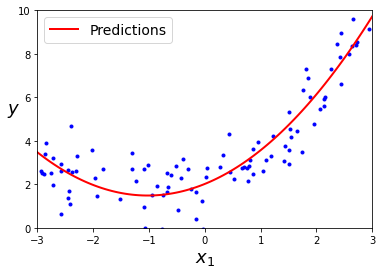

In [21]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# **Ejercicio 1**

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [22]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [23]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [24]:
len(X)

1000

In [25]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

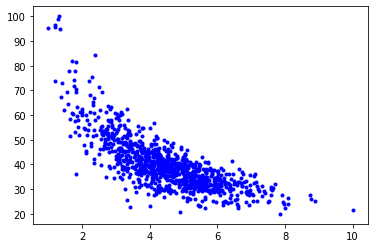

In [26]:
plt.plot(X,y,'b.')

## **Inicio del Ejecicio 1**:

### Divide los datos del costo de manufactura. Utiliza la función **train_test_split** (viene el ejemplo al final del notebook).

In [27]:
from sklearn.model_selection import train_test_split 

# Dividimos los datos con un 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (800, 1)
X_test:  (200, 1)
y_train:  (800,)
y_test:  (200,)


### **Regresión Lineal** 
### Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [28]:
#lineal
linreg = LinearRegression(fit_intercept=True)  

# Entrenamos el modelo
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_train)

# Calculamos los parametros
print('a = ', linreg.coef_)
print('b = ', linreg.intercept_)

a =  [-6.21850698]
b =  67.89012908512075


**Modelo generado:**

${y} = -6.22X + 67.89$

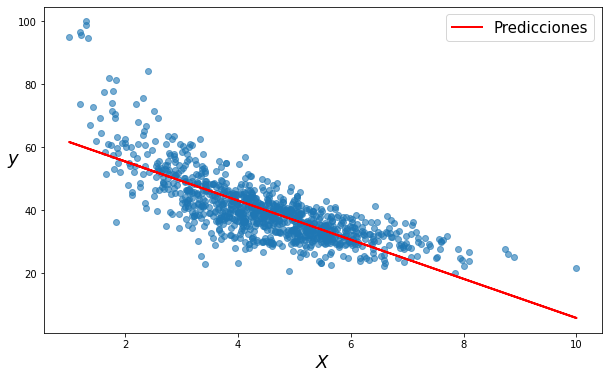

In [29]:
# visualizacion
plt.figure(figsize=[10, 6])
plt.scatter(X, y, alpha=0.6)
plt.plot(X_train, y_pred, "r-", linewidth=2, label="Predicciones")
 
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=15);

Calculamos los errores **MAE**, **MSE** y **R²** para los datos de entrenamiento:

In [30]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Datos de Entrenamiento:')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error (MSE):', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('R-cuadrada', r2_score(y_train, y_pred))

Datos de Entrenamiento:
Error medio Absoluto (MAE): 5.053412838264229
Root Mean Squared Error (MSE): 7.092192048104233
R-cuadrada 0.5796922294528


Ahora calculamos los errores de la predicción con datos de prueba:

In [31]:
# Predicciones con los datos de prueba

y_hat = linreg.predict(X_test)

In [32]:
MAE_lineal = metrics.mean_absolute_error(y_test, y_hat)
MSE_lineal = np.sqrt(metrics.mean_squared_error(y_test, y_hat))
R2_lineal = r2_score(y_test, y_hat)

print('Datos de Prueba:')
print('Error medio Absoluto (MAE)=', MAE_lineal)
print('Root Mean Squared Error (MSE)=', MSE_lineal)
print('R-cuadrada =', R2_lineal)

Datos de Prueba:
Error medio Absoluto (MAE)= 4.513943834797746
Root Mean Squared Error (MSE)= 5.932738736518161
R-cuadrada = 0.5695897011831419


### **Regresión Polinomial**

### Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [33]:
# Dividimos de nuevo los datos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('X_train1: ', X_train1.shape)
print('X_test1: ', X_test1.shape)
print('y_train1: ', y_train1.shape)
print('y_test1: ', y_test1.shape)

X_train1:  (800, 1)
X_test1:  (200, 1)
y_train1:  (800,)
y_test1:  (200,)


In [34]:
#polinomial
# Generamos nueva matriz con las combinaciones ploinomiales de grado especificado
poly_features1 = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly1 = poly_features1.fit_transform(X_train1) 

X_train_poly1

array([[   1.86522775,    3.47907457,    6.48926643,   12.10395984],
       [   4.54842911,   20.68820735,   94.09884451,  428.00192338],
       [   5.11287348,   26.14147523,  133.65805547,  683.37672734],
       ...,
       [   5.85509721,   34.2821633 ,  200.72539861, 1175.26672076],
       [   4.24212411,   17.99561697,   76.33964065,  323.84223024],
       [   2.79408325,    7.80690121,   21.81313192,   60.94770656]])

In [35]:
# Entrenamos el modelo con los datos de entrenamiento transformados
linreg1 = LinearRegression(fit_intercept=True)
linreg1.fit(X_train_poly1, y_train1) 
y_pred1 = linreg1.predict(X_train_poly1)

# Calculamos los parametros
print('a1, a2, a3, a4 = ', linreg1.coef_)
print('b = ', linreg1.intercept_)

a1, a2, a3, a4 =  [-5.48053513e+01  1.21644641e+01 -1.26644861e+00  4.90848244e-02]
b =  133.24714610652134


**Modelo generado:**

${y} =  -54.8X + 12.16X^2 - 1.27X^3 + 0.05X^4 + 133.25$

**Reacomodando los términos:**

${y} = 0.05X^4 - 1.27X^3 + 12.16X^2 - 54.8X + 133.25$

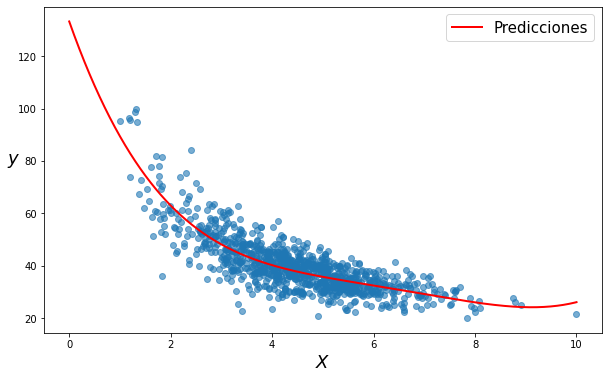

In [36]:
# visualizacion
X_fit1 = np.linspace(0, 10, 1000).reshape(1000, 1)
X_new_poly1 = poly_features1.fit_transform(X_fit1)
X_new_poly1
y_fit1 = linreg1.predict(X_new_poly1)

plt.figure(figsize=[10, 6])
plt.scatter(X, y, alpha=0.6)
plt.plot(X_fit1, y_fit1, "r-", linewidth=2, label="Predicciones")
 
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=15)

Calculamos los errores **MAE**, **MSE** y **R²** para los datos de entrenamiento:

In [37]:
print('Datos de Entrenamiento:')
print('Error medio Absoluto (MAE)=', metrics.mean_absolute_error(y_train1, y_pred1))
print('Root Mean Squared Error (MSE)=', np.sqrt(metrics.mean_squared_error(y_train1, y_pred1)))
print('R-cuadrada =', r2_score(y_train1, y_pred1))

Datos de Entrenamiento:
Error medio Absoluto (MAE)= 4.502110629437977
Root Mean Squared Error (MSE)= 5.930560933513295
R-cuadrada = 0.7061010804308335


Ahora calculamos **MAE**, **MSE** y **R²** de la predicción con datos de prueba:

In [38]:
# Predicciones con los datos de prueba
X_test_poly1 = poly_features1.fit_transform(X_test1)

y_hat1 = linreg1.predict(X_test_poly1)

In [39]:
MAE_polinom = metrics.mean_absolute_error(y_test1, y_hat1)
MSE_polinom = np.sqrt(metrics.mean_squared_error(y_test1, y_hat1))
R2_polinom = r2_score(y_test1, y_hat1) 

print('Datos de Prueba:')
print('Error medio Absoluto (MAE)=', MAE_polinom)
print('Root Mean Squared Error (MSE =', MSE_polinom)
print('R-cuadrada =', R2_polinom)

Datos de Prueba:
Error medio Absoluto (MAE)= 4.245119032434166
Root Mean Squared Error (MSE = 5.617974441430531
R-cuadrada = 0.6140493952743353


###Realiza la regresión con **Ridge** y **Lasso**. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [40]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 


### **Regresión Ridge**

In [41]:
ridge_reg = Ridge(alpha=0.5, solver='auto')
ridge_reg.fit(X_train_poly1, y_train1)

y_pred_R = ridge_reg.predict(X_train_poly1) 

# Calculamos los parametros
print('a1, a2, a3, a4 = ', ridge_reg.coef_)
print('b = ', ridge_reg.intercept_)

a1, a2, a3, a4 =  [-3.69736509e+01  6.26806624e+00 -4.74518352e-01  1.21810736e-02]
b =  115.15782197498729


**Modelo generado:**

${y} =  -36.97X + 6.27X^2 - 0.48X^3 + 0.012X^4 + 115.16$

**Reacomodando los términos:**

${y} = 0.012X^4 - 0.48X^3 + 6.27X^2 -36.97X + 115.16$

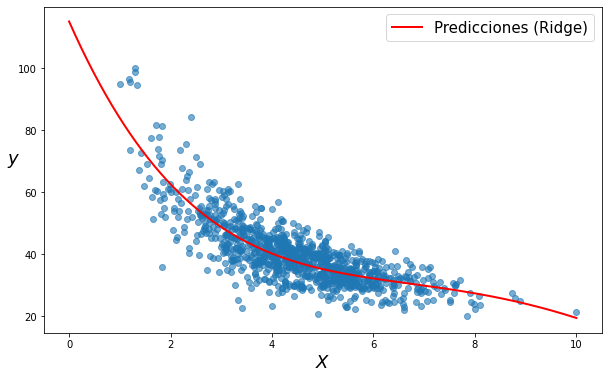

In [42]:
# visualizacion
X_fit2 = np.linspace(0, 10, 1000).reshape(1000, 1)
X_new_poly2 = poly_features1.fit_transform(X_fit2)
X_new_poly2
y_fit2 = ridge_reg.predict(X_new_poly2)

plt.figure(figsize=[10, 6])
plt.scatter(X, y, alpha=0.6)
plt.plot(X_fit2, y_fit2, "r-", linewidth=2, label="Predicciones (Ridge)")
 
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=15)

Calculamos los errores **MAE**, **MSE** y **R²** para los datos de entrenamiento:

In [43]:
print('Datos de Entrenamiento:')
print('Error medio Absoluto (MAE)=', metrics.mean_absolute_error(y_train1, y_pred_R))
print('Root Mean Squared Error (MSE)=', np.sqrt(metrics.mean_squared_error(y_train1, y_pred_R)))
print('R-cuadrada =', r2_score(y_train1, y_pred_R))

Datos de Entrenamiento:
Error medio Absoluto (MAE)= 4.50711368434034
Root Mean Squared Error (MSE)= 5.967156100728244
R-cuadrada = 0.7024628197212527


Ahora calculamos **MAE**, **MSE** y **R²** de la predicción con datos de prueba:

In [44]:
# Predicciones con los datos de prueba
y_hat_R = ridge_reg.predict(X_test_poly1)

MAE_ridge = metrics.mean_absolute_error(y_test1, y_hat_R)
MSE_ridge = np.sqrt(metrics.mean_squared_error(y_test1, y_hat_R))
R2_ridge = r2_score(y_test1, y_hat_R)

print('Datos de Prueba:')
print('Error medio Absoluto (MAE)=', MAE_ridge)
print('Root Mean Squared Error (MSE)=', MSE_ridge)
print('R-cuadrada =', R2_ridge)

Datos de Prueba:
Error medio Absoluto (MAE)= 4.258474899746155
Root Mean Squared Error (MSE)= 5.636448148974497
R-cuadrada = 0.6115069624318024


### **Regresión Lasso**

In [45]:
lasso_reg = Lasso(alpha=.001)
lasso_reg.fit(X_train_poly1, y_train1)

y_pred_L = lasso_reg.predict(X_train_poly1) 

# Calculamos los parametros
print('a1, a2, a3, a4 = ', lasso_reg.coef_)
print('b = ', lasso_reg.intercept_)

a1, a2, a3, a4 =  [-2.78996308e+01  3.03100352e+00 -1.23079089e-02 -1.04806749e-02]
b =  106.8189757370227


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+04, tolerance: 9.574e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


**Modelo generado:**

${y} =  -27.90X + 3.03X^2 - 0.012X^3 - 0.01X^4 + 106.82$

**Reacomodando los términos:**

${y} = - 0.01X^4 - 0.012X^3 + 3.03X^2 -27.90X + 106.82$ 

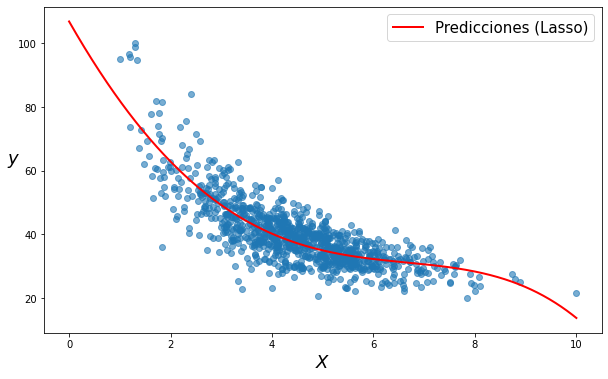

In [46]:
# visualizacion
X_fit3 = np.linspace(0, 10, 1000).reshape(1000, 1)
X_new_poly3 = poly_features1.fit_transform(X_fit3)
X_new_poly3
y_fit3 = lasso_reg.predict(X_new_poly3)

plt.figure(figsize=[10, 6])
plt.scatter(X, y, alpha=0.6)
plt.plot(X_fit3, y_fit3, "r-", linewidth=2, label="Predicciones (Lasso)")
 
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=15)

Calculamos los errores **MAE**, **MSE** y **R²** para los datos de entrenamiento:

In [47]:
print('Datos de Entrenamiento:')
print('Error medio Absoluto (MAE)=', metrics.mean_absolute_error(y_train1, y_pred_L))
print('Root Mean Squared Error (MSE)=', np.sqrt(metrics.mean_squared_error(y_train1, y_pred_L)))
print('R-cuadrada =', r2_score(y_train1, y_pred_L))

Datos de Entrenamiento:
Error medio Absoluto (MAE)= 4.546350988235677
Root Mean Squared Error (MSE)= 6.016233955316288
R-cuadrada = 0.6975484060562192


Ahora calculamos **MAE**, **MSE** y **R²** de la predicción con datos de prueba:

In [48]:
# Predicciones con los datos de prueba
y_hat_L = lasso_reg.predict(X_test_poly1)

MAE_lasso = metrics.mean_absolute_error(y_test1, y_hat_L)
MSE_lasso = np.sqrt(metrics.mean_squared_error(y_test1, y_hat_L))
R2_lasso = r2_score(y_test1, y_hat_L)

print('Datos de Prueba:')
print('Error medio Absoluto (MAE)=', metrics.mean_absolute_error(y_test1, y_hat_L))
print('Root Mean Squared Error (MSE)=', np.sqrt(metrics.mean_squared_error(y_test1, y_hat_L)))
print('R-cuadrada =', r2_score(y_test1, y_hat_L))

Datos de Prueba:
Error medio Absoluto (MAE)= 4.285377856077166
Root Mean Squared Error (MSE)= 5.690017211246994
R-cuadrada = 0.6040873596938308


### Finalmente grafica :
**MAE (de los cuatro métodos)**

**R2 (de los cuatro métodos)**

,0,1,2,3
Regresion,Lineal,Polinomial,Ridge,Lasso
MAE,4.513944,4.245119,4.258475,4.285378


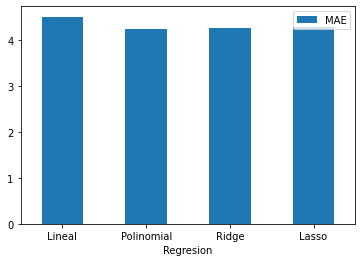

In [49]:
#MAE
MAE_list = pd.DataFrame({'Regresion':['Lineal', 'Polinomial', 'Ridge', 'Lasso'], 
                         'MAE':[MAE_lineal, MAE_polinom, MAE_ridge, MAE_lasso]
                         })

ax = MAE_list.plot.bar(x='Regresion', y='MAE', rot=0)
MAE_list.transpose()

,0,1,2,3
Regresion,Lineal,Polinomial,Ridge,Lasso
R2,0.56959,0.614049,0.611507,0.604087


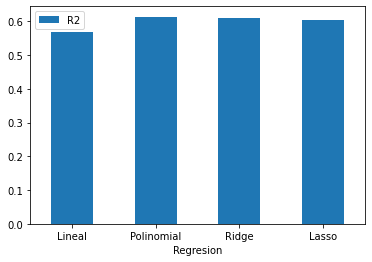

In [50]:
#R-cuadrada
R2_list = pd.DataFrame({'Regresion':['Lineal', 'Polinomial', 'Ridge', 'Lasso'], 
                         'R2':[R2_lineal, R2_polinom, R2_ridge, R2_lasso]
                         })

ax = R2_list.plot.bar(x='Regresion', y='R2', rot=0)
R2_list.transpose()

### ¿Qué método conviene más a la empresa, por qué? 

Podemos observar que el modelo de regresión lineal no se ajusta adecuadamente a los datos. Esto resulta obvio al observar que los datos siguen una curva tipo parabólica, lo cual nos indica que por lo menos necesitamos un modelo cuadrático.  
Por lo tanto, el modelo de regresión Polinomial resulta más adecuado, en nuestro caso usamos un grado 4. De acuerdo con las metricas MAE y R2 confirmamos que el modelo polinomial se comporta un poco mejor que Ridge y Lasso. Además, aplicando los métodos de regularización mejora un poco el ajuste del modelo con la regresión Ridge.   


### ¿Qué porcentajes de entrenamiento y evaluación usaste? 
Para los cuatro modelos usamos un 80% de los datos para entrenamiento y 20% para evaluación. 

### ¿Qué error tienes, es bueno, como lo sabes? 
Evaluamos que tan bueno o malo es nuestro modelo mediante las métricas: Error medio absoluto (MAE) y R2. En general buscamos un bajo error MAE y un R2 cercano a 1. 
Con ayuda de las graficas de los 4 modelos, vemos que el Polinomial, Ridge y Lasso tienen un valor de MAE muy parecido entre 4.24 y 4.28. Los datos de la variable dependiente (costo de manufactura) estan en el rango de entre 20 y 100, por lo que pudiéramos asumir como aceptable los valores de error MAE. De igual manera, el modelo Polinomial y Ridge tienen un R2 practicamente igual y el modelo Lineal se queda mas abajo.

# Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [53]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [54]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


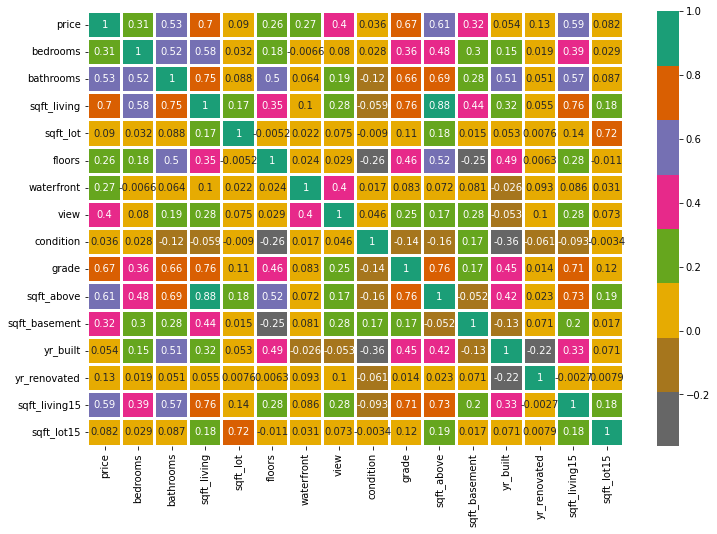

In [55]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [56]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

## **Inicio del Ejecicio 2**:

### Encuentra el mejor regresor para los datos de las casas:

Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [58]:
y.describe()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


### **Regresión Múltiple Lineal.**
### Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

In [59]:
#tu codigo aquí
mlinreg = LinearRegression(fit_intercept=True)  

# Entrenamos el modelo
mlinreg.fit(X_train, y_train)

# Calculamos los parametros 
print('Coeficientes:\n', mlinreg.coef_)     # 15 coeficientes
print('b = ', mlinreg.intercept_)

Coeficientes:
 [[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750271e+01  6.02175565e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]]
b =  [6151359.2627409]


Calculamos los errores **MAE**, **MSE** y **R²** con los datos de prueba:

In [60]:
# Predicciones con los datos de prueba
y_mhat = mlinreg.predict(X_test)

# Calculamos las metricas
MAE_lineal2 = metrics.mean_absolute_error(y_test, y_mhat)
MSE_lineal2 = np.sqrt(metrics.mean_squared_error(y_test, y_mhat))
R2_lineal2 = r2_score(y_test, y_mhat)

print('Error medio Absoluto (MAE)=', MAE_lineal2)
print('Root Mean Squared Error (MSE)=', MSE_lineal2)
print('R-cuadrada =', R2_lineal2)

Error medio Absoluto (MAE)= 137480.1388273178
Root Mean Squared Error (MSE)= 232133.3676240749
R-cuadrada = 0.6579723205007814


### **Regresión Múltiple Polinomial.**
### Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.

In [61]:
#polinomial
# Generamos nueva matriz con las combinaciones ploinomiales de grado especificado
mpoly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_mpoly = mpoly_features.fit_transform(X_train) 

X_train_mpoly

array([[5.00000000e+00, 2.75000000e+00, 3.75000000e+03, ...,
        9.73440000e+06, 2.26356000e+07, 5.26350250e+07],
       [4.00000000e+00, 4.50000000e+00, 5.25000000e+03, ...,
        6.25000000e+06, 1.20880000e+08, 2.33791590e+09],
       [3.00000000e+00, 2.50000000e+00, 2.88000000e+03, ...,
        8.76160000e+06, 3.11214400e+07, 1.10544196e+08],
       ...,
       [3.00000000e+00, 2.25000000e+00, 1.78000000e+03, ...,
        2.28010000e+06, 1.15137500e+07, 5.81406250e+07],
       [2.00000000e+00, 1.00000000e+00, 1.15000000e+03, ...,
        2.14036900e+06, 6.32016000e+06, 1.86624000e+07],
       [3.00000000e+00, 1.00000000e+00, 1.45000000e+03, ...,
        1.08160000e+06, 8.04960000e+06, 5.99076000e+07]])

In [62]:
# Entrenamos el modelo con los datos de entrenamiento transformados
mlinreg1 = LinearRegression(fit_intercept=True)
mlinreg1.fit(X_train_mpoly, y_train) 

# Calculamos los parametros
print('Coeficientes:\n', mlinreg1.coef_)
print('b = ', mlinreg1.intercept_)

Coeficientes:
 [[ 9.33912834e+05 -1.09330730e+06 -4.56449932e+02 -2.78686288e+01
  -2.07407238e+06 -3.95431870e+06 -2.88638026e+05  5.58697570e+05
   1.09864510e+06 -2.19758415e+02 -3.82034272e+02 -8.59630908e+04
  -2.95351595e+03  3.99965710e+03 -3.40106316e+01  9.57541696e+02
   7.49958190e+03 -1.37969466e+01 -1.84926695e-02  8.57699569e+03
  -1.14965893e+04 -3.06588900e+02 -5.24628836e+03 -5.36788065e+03
  -1.20757669e+00 -1.46068182e+01 -4.67099451e+02 -9.13191519e+00
   1.72800642e+01  2.15500198e-01 -9.63429892e+03  1.53879172e+01
  -1.35842369e-01 -2.59067293e+04  4.33707238e+04  3.82942459e+03
  -1.07592927e+03  2.22971689e+04  1.44292325e+01  1.33928361e+00
   5.03401980e+02 -1.70798805e+01 -1.72895923e+01 -5.56785248e-02
   1.56185890e+00 -4.34972758e+00  4.83299456e+00  1.60303193e+02
  -1.42711737e+01  1.31138593e+01  2.07283397e+01  2.61335089e+00
  -4.41381412e+00 -2.20765903e+00  6.36282684e-02  3.53629072e+00
   1.88176819e+01  3.06637958e-07  4.40839907e-01 -9.84216136

Calculamos los errores **MAE**, **MSE** y **R²** con los datos de prueba:

In [63]:
# Predicciones con los datos de prueba
X_test_mpoly = mpoly_features.fit_transform(X_test)
y_mphat = mlinreg1.predict(X_test_mpoly)

# Calculamos las metricas
MAE_polinom2 = metrics.mean_absolute_error(y_test, y_mphat)
MSE_polinom2 = np.sqrt(metrics.mean_squared_error(y_test, y_mphat))
R2_polinom2 = r2_score(y_test, y_mphat) 

print('Error medio Absoluto (MAE)=', MAE_polinom2)
print('Root Mean Squared Error (MSE)=', MSE_polinom2)
print('R-cuadrada =', R2_polinom2)

Error medio Absoluto (MAE)= 121314.06948173394
Root Mean Squared Error (MSE)= 186261.28575138954
R-cuadrada = 0.7797929072570198


### Regresión con **Ridge** y **Lasso**. Incluye la ecuación de tu modelo, errores y r cuadrada.

### **Regresión Múltiple Ridge**

In [64]:
# Entrenamos el modelo con los datos de entrenamiento transformados
ridge_mreg = Ridge(alpha=100, solver='auto')
ridge_mreg.fit(X_train_mpoly, y_train)

# Calculamos los parametros
print('Coeficientes:\n', ridge_mreg.coef_)
print('b = ', ridge_mreg.intercept_)

Coeficientes:
 [[ 1.05883462e+04 -3.72731073e+03 -2.51183212e+02 -2.90079119e+01
  -4.40783324e+03 -9.94031439e+02 -5.76577038e+03  6.67273054e+03
   7.62381495e+03 -3.03802315e+02  5.14341183e+01 -8.29335107e+04
  -3.17506601e+03  4.25915446e+03 -3.48969383e+01  8.99745649e+02
  -1.00376556e+02 -1.03666506e+01 -1.82326227e-02  3.95607841e+03
  -4.56067934e+03 -7.19211670e+02 -3.10143537e+02 -5.43323294e+03
  -5.65490036e-01 -1.18121575e+01  4.08864489e+00 -8.83444380e-01
   1.39281978e+01  1.81258061e-01 -2.81714265e+03  1.48066907e+01
  -1.39114597e-01 -1.13043459e+04  8.75428658e+03  6.30217636e+03
  -1.13813717e+04  1.34441683e+04  1.42826262e+01  1.73082390e+00
  -1.87747407e+01 -2.73440700e+01 -8.46917818e+00 -1.69309264e-02
   7.85468680e-01  5.77305825e-01  1.53166989e+00  1.50225533e+02
  -1.32180219e+01  1.31588260e+01  2.49278629e+01 -1.67105129e-01
  -1.23779093e-01 -3.88957290e-01  1.11772918e+00  2.78451853e-01
   5.09801106e-01  3.37770095e-07  4.61802769e-01  6.15540212

Calculamos los errores **MAE**, **MSE** y **R²** con los datos de prueba:

In [65]:
# Predicciones con los datos de prueba
y_mhat_R = ridge_mreg.predict(X_test_mpoly)

# Calculamos las metricas
MAE_ridge2 = metrics.mean_absolute_error(y_test, y_mhat_R)
MSE_ridge2 = np.sqrt(metrics.mean_squared_error(y_test, y_mhat_R))
R2_ridge2 = r2_score(y_test, y_mhat_R)

print('Error medio Absoluto (MAE)=', MAE_ridge2)
print('Root Mean Squared Error (MSE)=', MSE_ridge2)
print('R-cuadrada =', R2_ridge2) 

Error medio Absoluto (MAE)= 121627.41130752185
Root Mean Squared Error (MSE)= 185728.54438512796
R-cuadrada = 0.7810507709943969


### **Regresión Múltiple Lasso**

In [66]:
# Entrenamos el modelo con los datos de entrenamiento transformados
lasso_mreg = Lasso(alpha=10)
lasso_mreg.fit(X_train_mpoly, y_train)

# Calculamos los parametros
print('Coeficientes:\n', lasso_mreg.coef_)
print('b = ', lasso_mreg.intercept_)

Coeficientes:
 [ 1.19306835e+05  1.49217598e+05  8.48214251e+01 -3.03878039e+00
 -3.66223414e+04 -0.00000000e+00  7.34036924e+04  1.19666181e+05
  1.74998176e+05 -1.80789467e+02 -4.46857190e+01 -3.92558810e+03
 -2.45628023e+02  1.38816393e+02 -1.51936264e+00  1.06046824e+03
 -2.84340791e+03 -2.03175958e+01 -1.79572975e-01  7.77909744e+03
 -2.12704799e+04 -6.79694982e+01 -1.45602376e+03 -3.67975937e+03
  7.19634907e+00 -1.89952327e-01 -6.00163597e+01  7.00002426e-02
  1.86486169e+01  2.66961369e-01  9.69582341e+02  4.60258135e+01
 -2.41349269e-02 -2.65912708e+04  4.95437249e+04  6.30096413e+03
 -1.98047201e+04  1.81085397e+04 -1.36671907e+01 -3.79422200e+01
 -6.67659882e+01 -2.71786209e+01 -3.40445546e+01  1.39945072e-01
  1.92075169e-02 -1.75927110e-04  2.84996875e+00  2.03695648e+00
  3.28872838e+01 -1.35624896e+01  2.23771739e+01 -5.31467482e-02
  2.61758490e-02 -5.39539122e-02 -1.99662429e-03  1.81428212e-03
 -4.67364641e-04 -8.88255197e-09  4.65475626e-01 -2.15636157e-01
 -1.007052

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.358e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Calculamos los errores **MAE**, **MSE** y **R²** con los datos de prueba:

In [67]:
# Predicciones con los datos de prueba
y_mhat_L = lasso_mreg.predict(X_test_mpoly)

# Calculamos las metricas
MAE_lasso2 = metrics.mean_absolute_error(y_test, y_mhat_L)
MSE_lasso2 = np.sqrt(metrics.mean_squared_error(y_test, y_mhat_L))
R2_lasso2 = r2_score(y_test, y_mhat_L)

print('Error medio Absoluto (MAE)=', MAE_lasso2)
print('Root Mean Squared Error (MSE)=', MSE_lasso2)
print('R-cuadrada =', R2_lasso2)  

Error medio Absoluto (MAE)= 122462.24084413491
Root Mean Squared Error (MSE)= 187920.37605650985
R-cuadrada = 0.7758525224569095


### Finalmente grafica :
**MAE (de los cuatro métodos)**

**R2 (de los cuatro métodos)**

,0,1,2,3
Regresion,Lineal,Polinomial,Ridge,Lasso
MAE,137480.138827,121314.069482,121627.411308,122462.240844


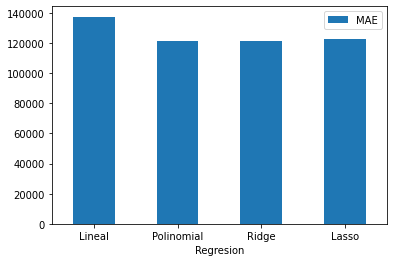

In [68]:
#MAE
MAE_list2 = pd.DataFrame({'Regresion':['Lineal', 'Polinomial', 'Ridge', 'Lasso'], 
                         'MAE':[MAE_lineal2, MAE_polinom2, MAE_ridge2, MAE_lasso2]
                         })

ax = MAE_list2.plot.bar(x='Regresion', y='MAE', rot=0)
MAE_list2.transpose()

,0,1,2,3
Regresion,Lineal,Polinomial,Ridge,Lasso
R2,0.657972,0.779793,0.781051,0.775853


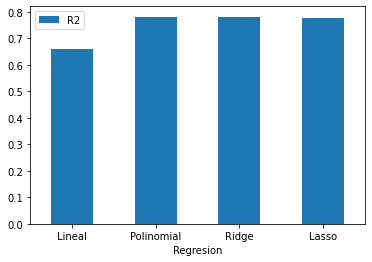

In [69]:
#R-cuadrada
R2_list2 = pd.DataFrame({'Regresion':['Lineal', 'Polinomial', 'Ridge', 'Lasso'], 
                         'R2':[R2_lineal2, R2_polinom2, R2_ridge2, R2_lasso2]
                         })

ax = R2_list2.plot.bar(x='Regresion', y='R2', rot=0)
R2_list2.transpose()

### ¿Qué método se aproxima mejor, por qué? 
Para este ejercicio encontramos que los métodos Polinomial y Ridge se aproximan mejor a los datos. En este caso no es posible visualizar la distribucion de todas las variables utilizadas, pero con los resultados de las métricas, encontramos que ambos modelos tienen un error MAE mas bajo y R2 mas alto.  

### ¿Qué porcentajes de entrenamiento y evaluación usaste? 
Para los cuatro modelos usamos un 80% de los datos para entrenamiento y 20% para evaluación 

### ¿Qué error tienes, es bueno, como lo sabes? 
Comparando la métrica de error MAE de los modelos, tenemos un error entre 121,600 y 121,300 para Ridge y Polinomial respectivamente. La mediana del precio de las casas es de 450,000 por lo que el error de nuestro modelo puede no ser tan bueno para determinar el precio de casas en rangos bajos.   

### Conclusion
En particular para estos dos ejercicios vemos que el modelo lineal es algo limitado en comparación con los modelos polinomiales. Observamos también que aplicar regularización como Ridge o Lasso pueden ayudar al ajuste del modelo, pero se debe tener precaución de no sobre-entrenar nuestro modelo.  

_ _ _
_ _ _